In [1]:
import torch

from PIL import Image
from transformers import AutoModelForCausalLM, AutoProcessor, AutoConfig

import matplotlib.pyplot as plt  
import matplotlib.patches as patches  

/opt/miniconda3/envs/zhonggong/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### This is a template for testing mathematical expressions and table LaTeX.

In [2]:
r"""
\documentclass[conference]{IEEEtran}
\usepackage{amsfonts}
\usepackage{xcolor}
\usepackage{amsmath}
\usepackage{braket}
\usepackage{mathrsfs}
\usepackage{mleftright}
\usepackage{bm}
\usepackage{amsthm}
\usepackage{mathtools}
\usepackage{amssymb}
\usepackage{xfrac}
\usepackage{nicefrac}
\usepackage{amsfonts}
\usepackage{bbm}
\usepackage{upgreek}
\usepackage{dsfont}
\usepackage{esint}
\usepackage{amsfonts}
\usepackage{bbm}
\usepackage{upgreek}
\usepackage{dsfont}
\usepackage{physics}
\usepackage{commath}
\usepackage{siunitx}
\usepackage{booktabs}
\usepackage{amsmath}
\usepackage{textcomp}
\usepackage{multirow}
\begin{document}


\begin{table*}
  *** Table Latex Code ***
\end{table*}

\begin{align*}
  *** Math Expression Latex Code ***
\end{align*}


\end{document}
"""

'\n\\documentclass[conference]{IEEEtran}\n\\usepackage{amsfonts}\n\\usepackage{xcolor}\n\\usepackage{amsmath}\n\\usepackage{braket}\n\\usepackage{mathrsfs}\n\\usepackage{mleftright}\n\\usepackage{bm}\n\\usepackage{amsthm}\n\\usepackage{mathtools}\n\\usepackage{amssymb}\n\\usepackage{xfrac}\n\\usepackage{nicefrac}\n\\usepackage{amsfonts}\n\\usepackage{bbm}\n\\usepackage{upgreek}\n\\usepackage{dsfont}\n\\usepackage{esint}\n\\usepackage{amsfonts}\n\\usepackage{bbm}\n\\usepackage{upgreek}\n\\usepackage{dsfont}\n\\usepackage{physics}\n\\usepackage{commath}\n\\usepackage{siunitx}\n\\usepackage{booktabs}\n\\usepackage{amsmath}\n\\usepackage{textcomp}\n\\usepackage{multirow}\n\\begin{document}\n\n\n\\begin{table*}\n  *** Table Latex Code ***\n\\end{table*}\n\n\\begin{align*}\n  *** Math Expression Latex Code ***\n\\end{align*}\n\n\n\\end{document}\n'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [7]:
path = '../DocFusion_base'

config = AutoConfig.from_pretrained(path, trust_remote_code=True)
model = AutoModelForCausalLM.from_config(config, trust_remote_code=True).to(device)
processor = AutoProcessor.from_pretrained(path,trust_remote_code=True)


# state_dict = torch.load('weight path')
# model.load_state_dict(state_dict)
# model.to(device)


<All keys matched successfully>

In [5]:
def run_example(task_prompt, image, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].to(device),
      pixel_values=inputs["pixel_values"].to(device),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text, 
        task=task_prompt, 
        image_size=(image.width, image.height)
    )

    return parsed_answer


def plot_bbox(image, data): 
    fig, ax = plt.subplots()   
    ax.imshow(image)  
 
    for bbox, label in zip(data['bboxes'], data['labels']):  
        x1, y1, x2, y2 = bbox  
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')    
        ax.add_patch(rect)  
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))  
      
    ax.axis('off')   
    plt.show()  

### 1. Document Layout Analysis

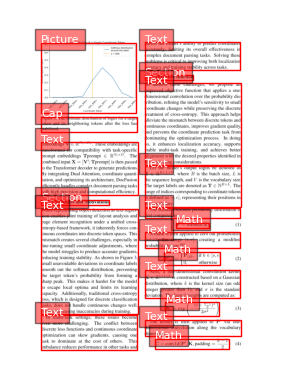

In [6]:
page_img = Image.open('./img_page.png')
task_prompt = "<DLA>"

results = run_example(task_prompt,page_img)
plot_bbox(page_img, results['<DLA>'])

### 2. Math Expression Recognition

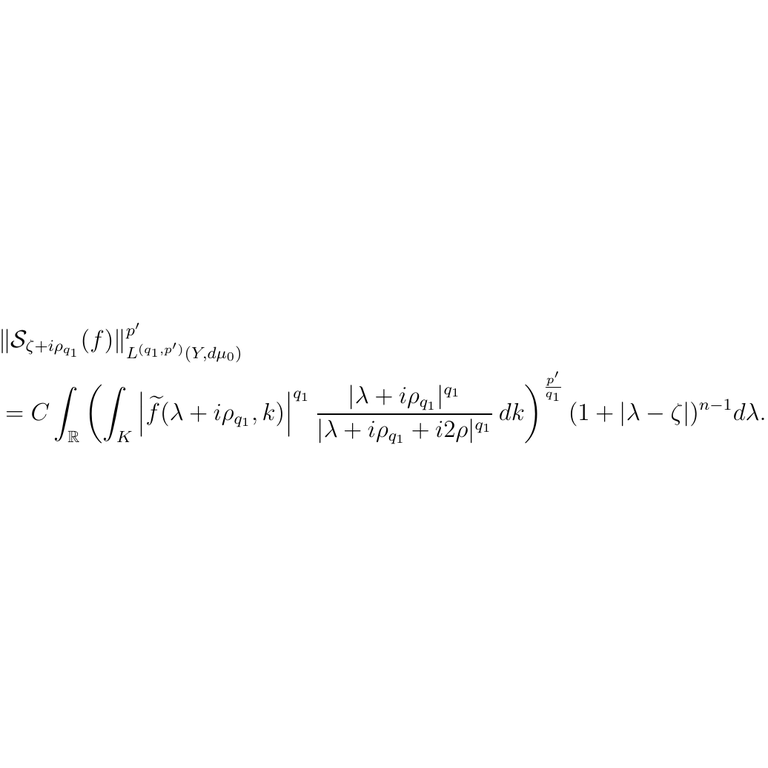

In [7]:
math_img = processor.resize_and_pad_image(Image.open('./img_math.png'))
task_prompt = '<MER>'
math_img

In [8]:
results = run_example(task_prompt, math_img)
print(results['<MER>'])

\begin{array}{rl}&{\displaystyle\|\mathcal{S}_{\zeta+i\rho_{q_{1}}}(f)\|_{L^{(q_{1},p^{\prime})}(Y,d\mu_{0})}^{p^{\prime}}}\\ &{\displaystyle=C\int_{\mathbb{R}}\left(\int_{K}\left|\widetilde{f}(\lambda+i\rho_{q_{1}},k)\right|^{q_{1}}\frac{|\lambda+i\rho_{q_{1}}|^{q_{1}}}{|\lambda+i\rho_{q_{1}}+i2\rho|^{q_{1}}}\,dk\right)^{\frac{p^{\prime}}{q_{1}}}(1+|\lambda-\zeta|)^{n-1}d\lambda.}\end{array}


### 3. Table Recognition

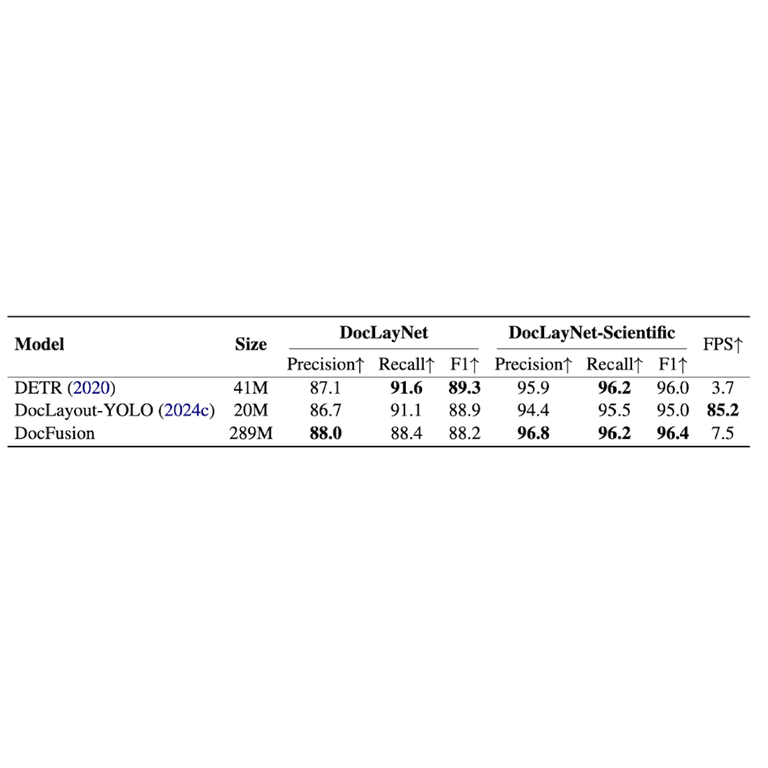

In [9]:
table_img = processor.resize_and_pad_image(Image.open('./img_table.png'))
task_prompt = '<TR>'
table_img

In [10]:
results = run_example(task_prompt, table_img)
print(results['<TR>'])

\begin{tabular}{lcccccccc} \toprule \multirow{3}{*}{\textbf{Model}} & \multirow{3}{*}{\textbf{Size}} & \multicolumn{3}{c}{\textbf{DocLayNet}} & \multicolumn{3}{c}{\textbf{DocLayNet-Scientific}} & \multirow{3}{*}{FPS$\uparrow$} \\ \cmidrule(lr){3-5} \cmidrule(lr){6-8} & & Precision$\uparrow$ & Recall$\uparrow$ & F1$\uparrow$ & Precision$\uparrow$ & Recall$\uparrow$ & F1$\uparrow$ & \\ \hline DETR (2020) & 41M & 87.1 & \textbf{91.6} & \textbf{89.3} & 95.9 & \textbf{96.2} & 96.0 & 3.7 \\ DocLayout-YOLO (2024c) & 20M & 86.7 & 91.1 & 88.9 & 94.4 & 95.5 & 95.0 & \textbf{85.2} \\ DocFusion & 289M & \textbf{88.0} & 88.4 & 88.2 & \textbf{96.8} & \textbf{96.2} & \textbf{96.4} & 7.5 \\ \hline \end{tabular}


### 4. Optical Character Recognition

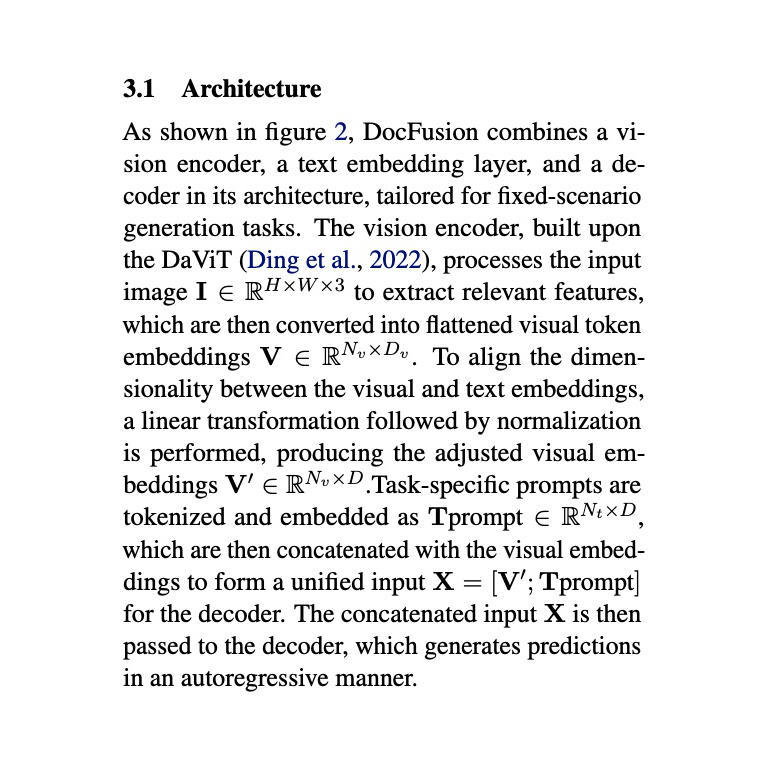

In [11]:
OCR_img = processor.resize_and_pad_image(Image.open('./img_text.png'))
task_prompt = '<OCR>'
OCR_img

In [12]:
results = run_example(task_prompt, OCR_img)
print(results['<OCR>'])

3.1 Architecture 
As shown in figure 2, DocFusion combines a vi- 
sion encoder, a text embedding layer, and a de- 
coder in its architecture, tailored for fixed-scenario 
generation tasks. The vision encoder, built upon 
the DaVit (Ding et al., 2022), processes the input 
image I ∈ R H X W X 3 to extract relevant features, 
which are then converted into flattened visual token 
embodings V ∈ R N$_{v}$ X D$_{v}$. To align the dimen- 
sionality between the visual and text embeddings, 
a linear transformation followed by normalization 
is performed, producing the adjusted visual em- 
bedings V ′ ∈ R N$_{v}$ X D$_{v}$. Task-specific prompts are 
tokenized and embedded as Tprompt ∈ R N$_{v}$ X D, 
which are then concatenated with the visual embed- 
dings to form a unified input X = [ V ′ ; Tprompt] 
for the decoder. The concatenated input X is then 
passed to the decoder, which generates predictions 
in an autoregressive manner.
